# MLE for Interacting Particle Systems
Author: Eliott Van Dieren - Imperial College London, EPFL

Supervisors: Prof. Grigorios Pavliotis, Prof. Fabio Nobile

Part of the work on non-parametric kernel estimation for interacting particle systems

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
from tqdm import tqdm
import scipy.stats as st
import scipy.special as sp
from pathlib import Path
import utils
import models

## On the circle

### Multi-Cosine

In [43]:
T = 5e4
N = 2
J = 4
n_steps = 5
dt = 1e-2

In [44]:
model = "potential_multicos"
directory = "data"
path = Path(f"./{directory}/{model}")
w_true = 1/np.arange(1,J+1)
print(w_true)
dict_ = utils.dict_(model,N,J,w_true)
#utils.gen_data(n_step,dt,T,dict_,directory,model)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['n2']}.npy")

[1.         0.5        0.33333333 0.25      ]
3.212133367208603e-07 6.2831850948095775


In [45]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,MLE_flag=True,domain="torus")

running main utils
w_true: [1.         0.5        0.33333333 0.25      ]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:36<00:00, 31894.35it/s]


[[1.00268501]
 [0.49404751]
 [0.32545271]
 [0.25237167]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:36<00:00, 31915.05it/s]


[[0.99203617]
 [0.49801299]
 [0.32751501]
 [0.24770663]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:32<00:00, 32764.17it/s]


[[1.00065915]
 [0.50253558]
 [0.33340947]
 [0.24780316]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:32<00:00, 32831.50it/s]


[[0.9902782 ]
 [0.49371241]
 [0.32783235]
 [0.2464247 ]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:31<00:00, 32897.51it/s]


[[1.00257034]
 [0.49045798]
 [0.32939099]
 [0.24788218]]


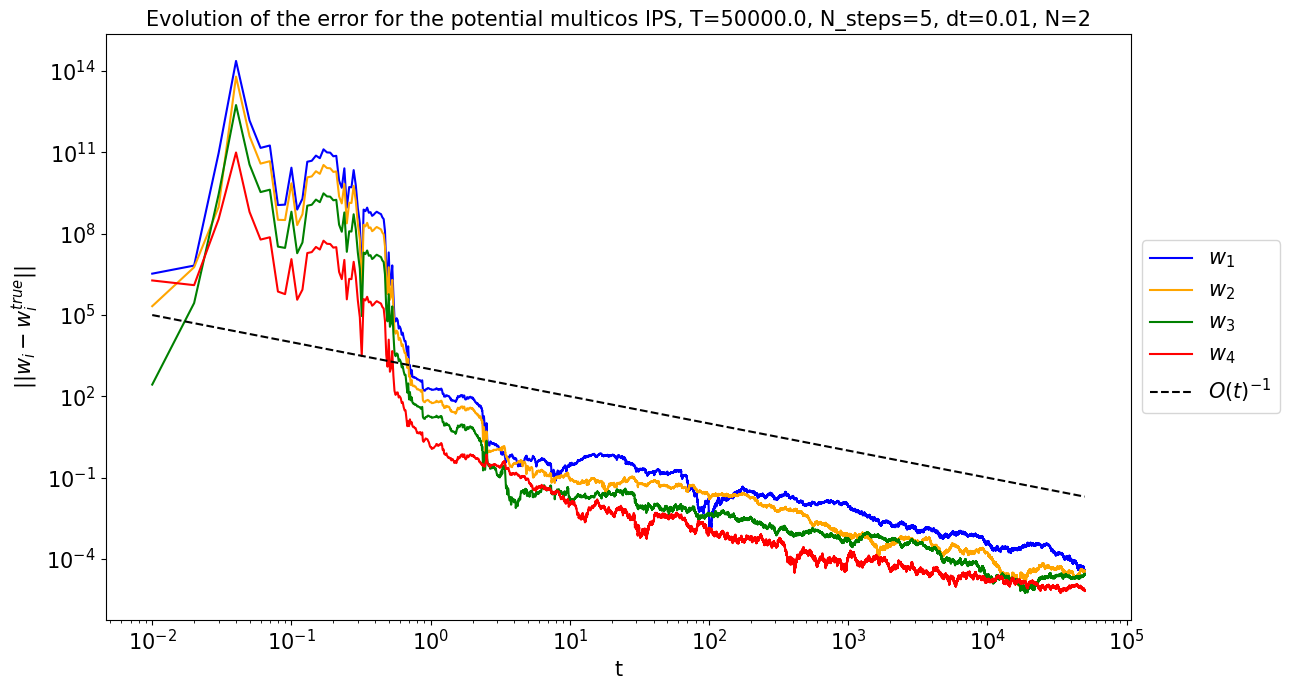

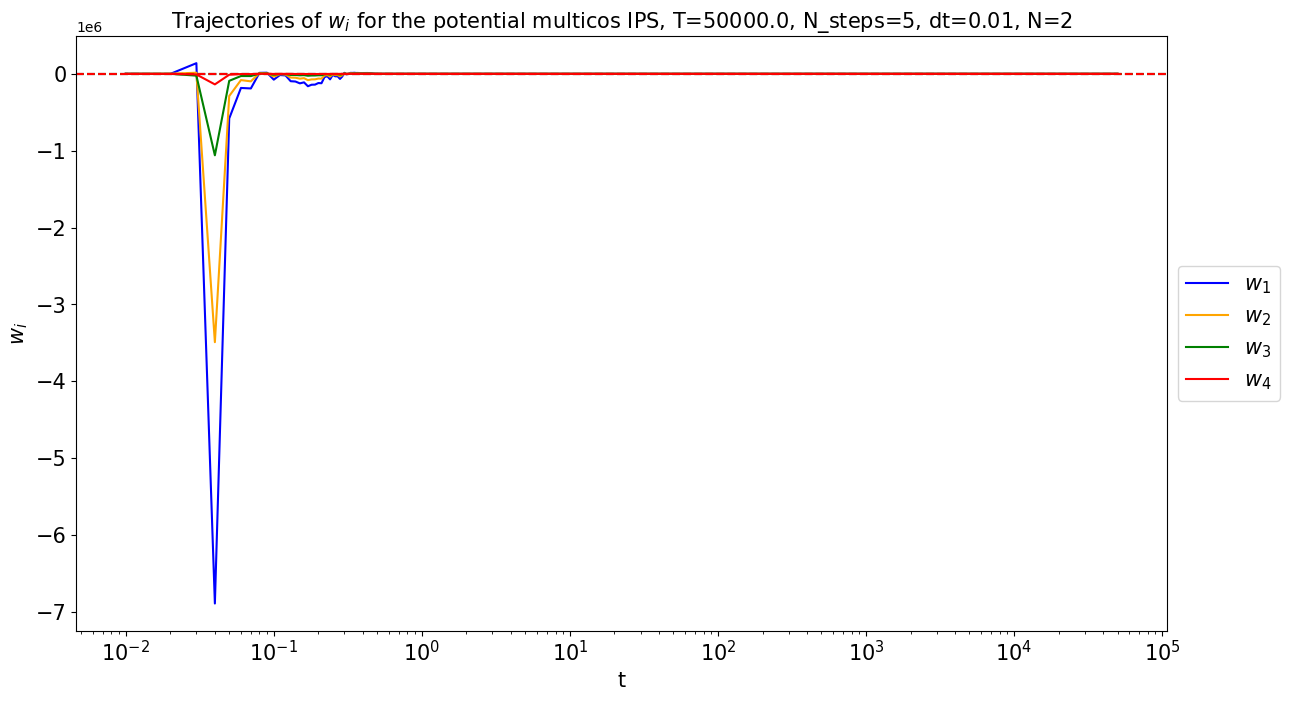

In [46]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,MLE_flag=True,saving=True)

#### von Mises

In [33]:
T = 5e4
N = 2
J = 4
n_steps = 5
dt = 1e-2

In [39]:
model = "von_mises"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = utils.dict_(model,N,J)
w_true = dict_["theta_star_dist"]
print(w_true)
#utils.gen_data(n_step,dt,T,dict_,directory,model)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['n2']}.npy")

von_mises
[7.71900241e-02 9.54978986e-03 7.91705177e-04 4.93277443e-05]
4.201854597596366e-08 6.283185288406658


In [41]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,MLE_flag=True,domain="torus")

running main utils
w_true: [7.71900241e-02 9.54978986e-03 7.91705177e-04 4.93277443e-05]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:33<00:00, 32654.56it/s]


[[ 7.50677843e-02]
 [ 9.72684747e-03]
 [ 5.86259521e-05]
 [-4.28053158e-04]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:30<00:00, 33261.46it/s]


[[ 0.06829285]
 [ 0.01605356]
 [ 0.00162924]
 [-0.00101749]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:29<00:00, 33386.83it/s]


[[ 0.07909202]
 [ 0.01197434]
 [ 0.00302654]
 [-0.00247753]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:30<00:00, 33138.47it/s]


[[ 0.09284152]
 [ 0.009295  ]
 [ 0.00208845]
 [-0.00246285]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:36<00:00, 31979.86it/s]


[[ 0.08322665]
 [ 0.01327937]
 [ 0.00108031]
 [-0.00077848]]


/Users/evandieren/Desktop/MF/mean_field_SDEs/utils.py:130: RuntimeWarning: divide by zero encountered in divide
  y =10/(0.01*x)


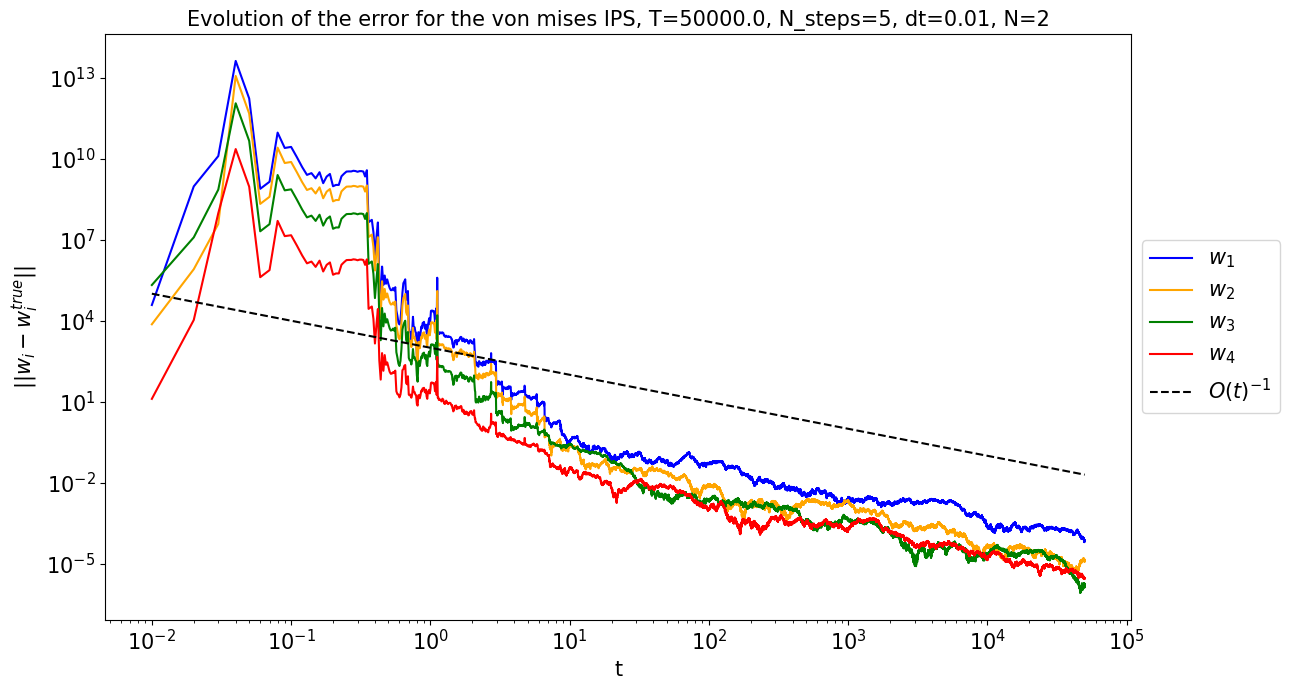

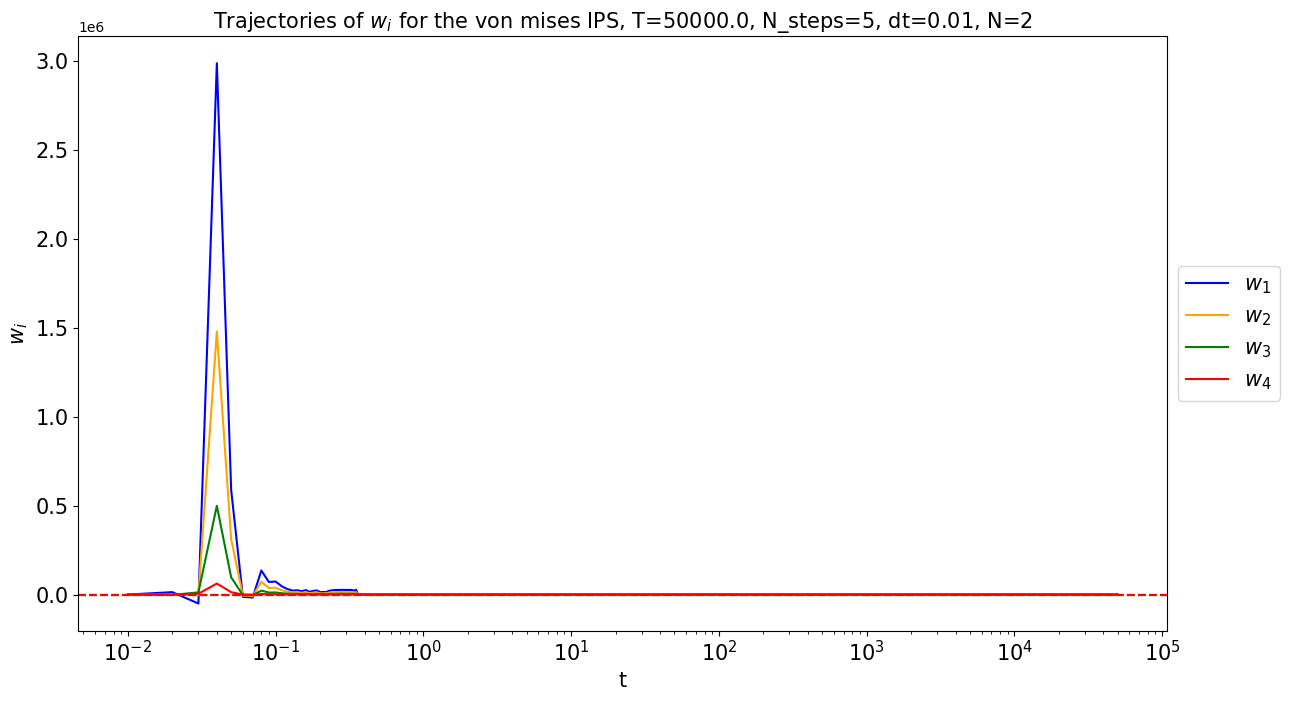

In [42]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,MLE_flag=True,saving=True)

#### Onsager

In [47]:
T = 5e4
N = 2
J = 4
n_step = 5
dt = 1e-2

In [48]:
model = "onsager"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = utils.dict_(model,N,J)

#utils.gen_data(n_step,dt,T,dict_,directory,model)

w_true = dict_["theta_star_dist"]
print(w_true)

X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['n2']}.npy")
dW = np.load(path/f"dW_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy")

[ 0.         -0.42441318  0.         -0.08488264]
3.244708945970842e-08 6.283185177275848


In [49]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,MLE_flag=True,domain="torus")

running main utils
w_true: [ 0.         -0.42441318  0.         -0.08488264]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:33<00:00, 32517.28it/s]


[[-0.00360084]
 [-0.42195429]
 [ 0.00073042]
 [-0.09953499]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:35<00:00, 32114.15it/s]


[[-0.00323961]
 [-0.43162569]
 [-0.00208945]
 [-0.09721049]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:40<00:00, 31230.42it/s]


[[-0.00939051]
 [-0.43480327]
 [ 0.0052661 ]
 [-0.09787347]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:38<00:00, 31609.30it/s]


[[-1.47379524e-03]
 [-4.28692965e-01]
 [-6.26218543e-05]
 [-9.97494967e-02]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:50<00:00, 29260.73it/s]


[[-0.00692838]
 [-0.42453822]
 [ 0.0030021 ]
 [-0.10033577]]


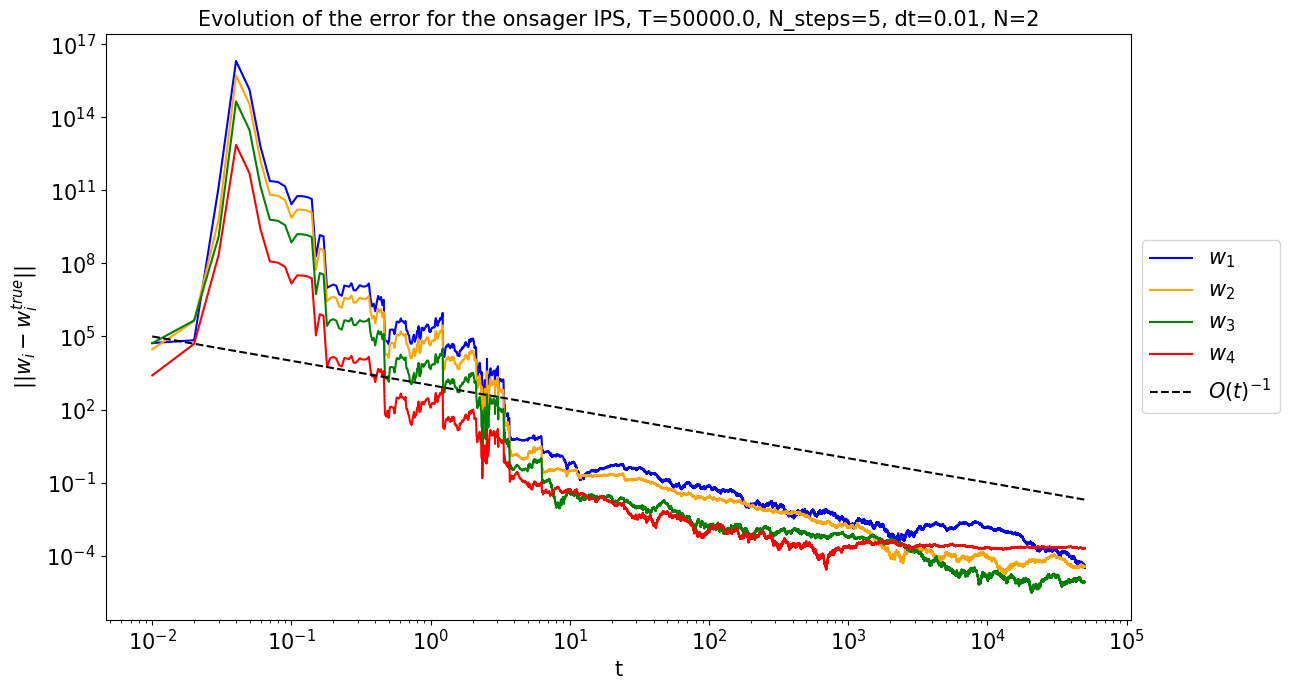

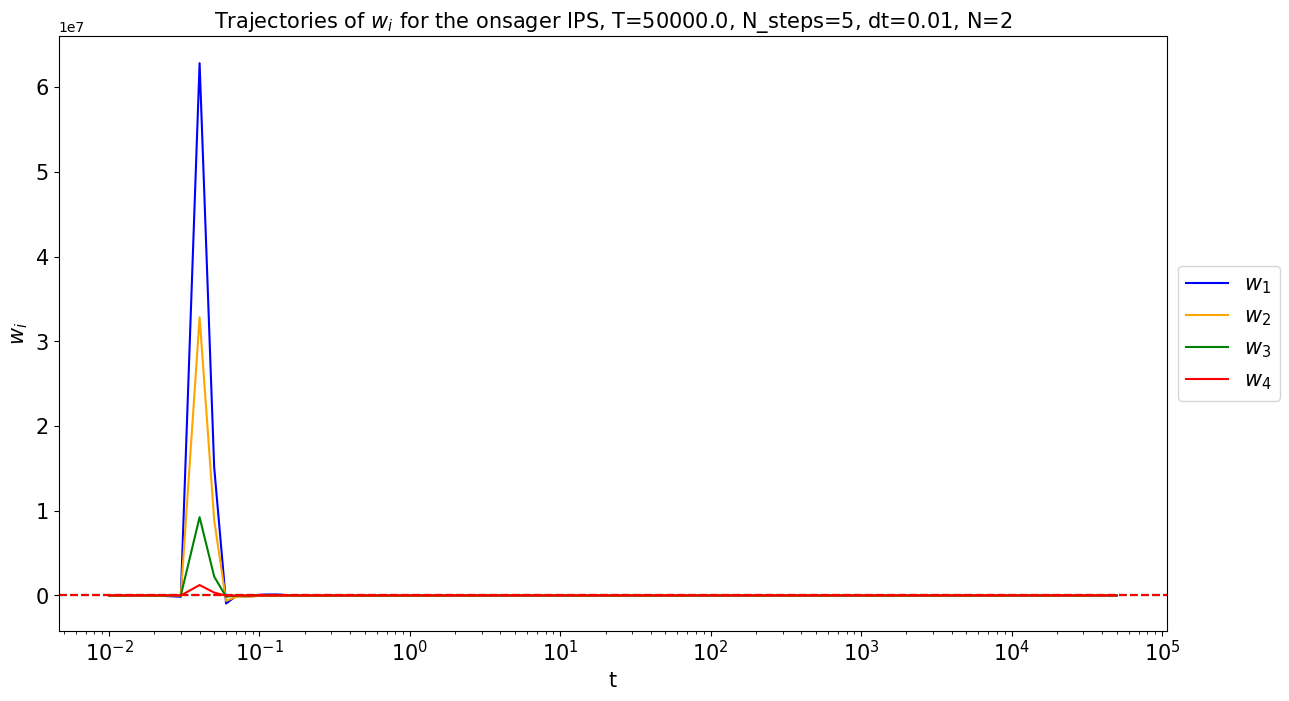

In [50]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,MLE_flag=True,saving=True)

#### Opinion dynamics

In [60]:
T = 5e4
N = 2
J = 4
n_step = 5
dt = 1e-2

In [62]:
model = "opinion"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = utils.dict_(model,N,J)

utils.gen_data(n_step,dt,T,dict_,directory,model)

w_true = dict_["theta_star_dist"]
print(w_true)

X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['n2']}.npy")
dW = np.load(path/f"dW_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy")
theta_star = np.load(path/f"theta_star_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy")

gen_data utils, right
n_step= 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [01:41<00:00, 49398.52it/s]


n_step= 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [01:40<00:00, 49694.48it/s]


n_step= 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [01:41<00:00, 49064.91it/s]


n_step= 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [01:40<00:00, 49567.98it/s]


n_step= 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [01:40<00:00, 49848.74it/s]


saved everything in data/opinion
[-1.57630714  0.0804495   0.19047918 -0.27822701]
5.27662589178135e-08 6.283185022220082


In [63]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,MLE_flag=True,domain="torus")

running main utils
w_true: [-1.57630714  0.0804495   0.19047918 -0.27822701]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:37<00:00, 31682.93it/s]


[[-1.36328677]
 [ 0.16481972]
 [-0.05401237]
 [ 0.02105103]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:35<00:00, 32082.32it/s]


[[-1.38792992]
 [ 0.17062896]
 [-0.06452623]
 [ 0.02217191]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:36<00:00, 31953.68it/s]


[[-1.37155195]
 [ 0.16275233]
 [-0.05790178]
 [ 0.02111083]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:31<00:00, 32906.32it/s]


[[-1.38692355]
 [ 0.175325  ]
 [-0.05544418]
 [ 0.01918889]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:30<00:00, 33168.80it/s]

[[-1.36825445]
 [ 0.17171553]
 [-0.05456973]
 [ 0.02105066]]


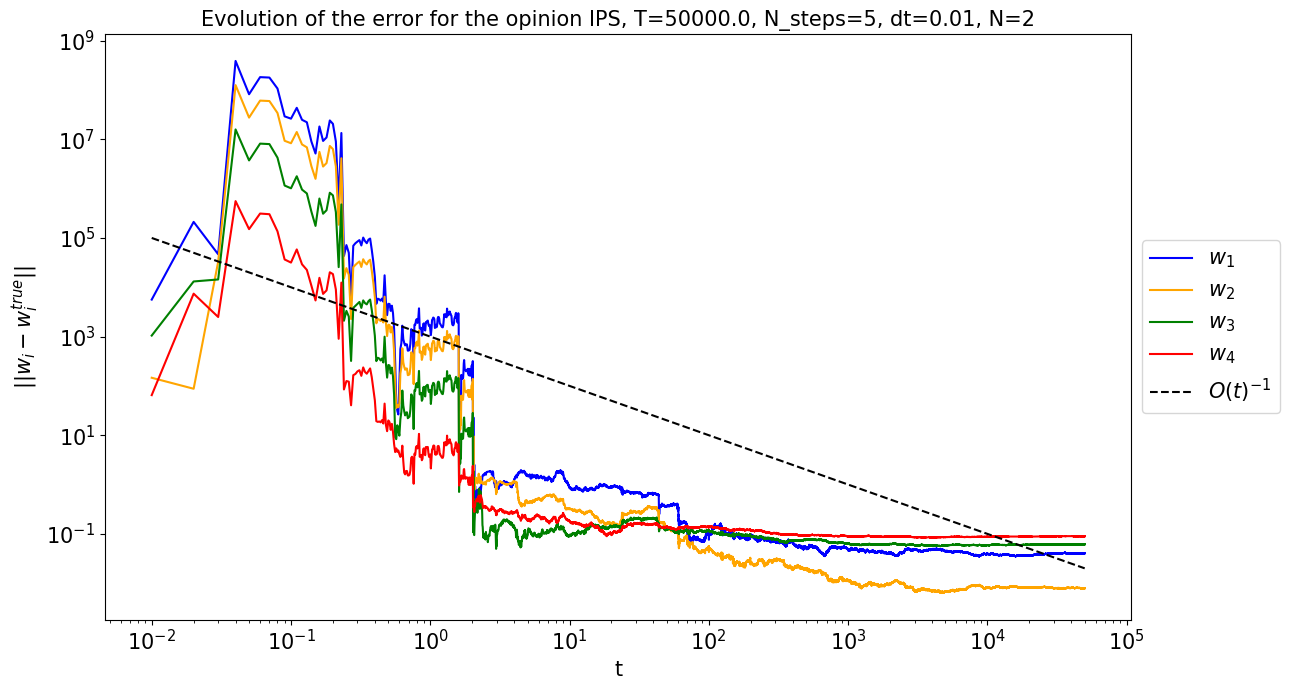

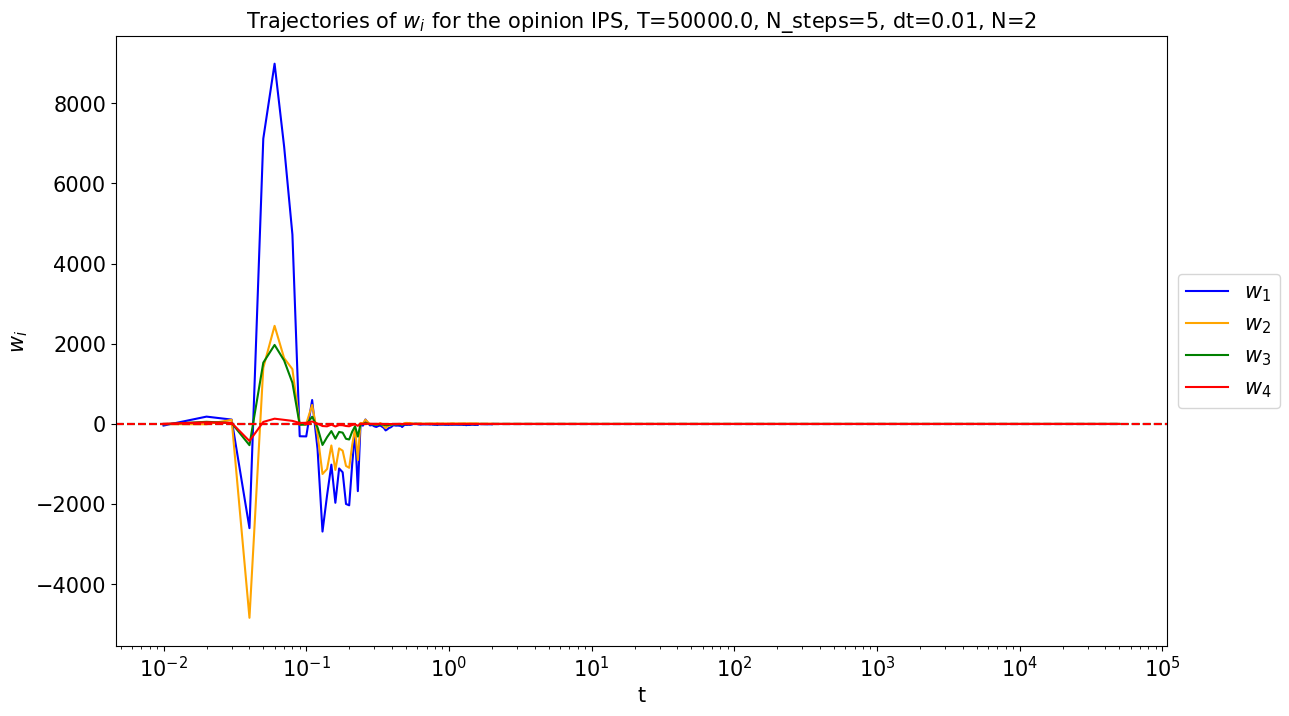

In [65]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,MLE_flag=True,saving=True)

### Testing on the real line

#### Multi Hermite potential

In [53]:
T = 5e4
N = 2
J = 4
n_steps = 5
dt = 1e-2

In [54]:
model = "potential_multihermite"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = utils.dict_(model,N,J)
w_true = dict_["theta_star_dist"]
print(w_true)
#utils.gen_data(n_step,dt,T,dict_,directory,model)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['n2']}.npy") # n_step,time,particles,1

[1.         0.5        0.33333333 0.25      ]
-6.1454414586756325 4.775261707236318


In [55]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,MLE_flag=True,domain="real_line")

running main utils
w_true: [1.         0.5        0.33333333 0.25      ]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:26<00:00, 34040.70it/s]


[[-0.21222161]
 [ 0.62488715]
 [ 0.32427588]
 [ 0.25013573]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:27<00:00, 33845.47it/s]


[[-0.21171467]
 [ 0.62605611]
 [ 0.32440254]
 [ 0.25032107]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:28<00:00, 33628.28it/s]


[[-0.21378201]
 [ 0.62379936]
 [ 0.32512357]
 [ 0.24995672]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:29<00:00, 33412.91it/s]


[[-0.2118566 ]
 [ 0.62533053]
 [ 0.32468234]
 [ 0.24987098]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:24<00:00, 34535.88it/s]

[[-0.21341498]
 [ 0.62422338]
 [ 0.32559859]
 [ 0.2499552 ]]


/Users/evandieren/Desktop/MF/mean_field_SDEs/utils.py:130: RuntimeWarning: divide by zero encountered in divide
  y =10/(0.01*x)


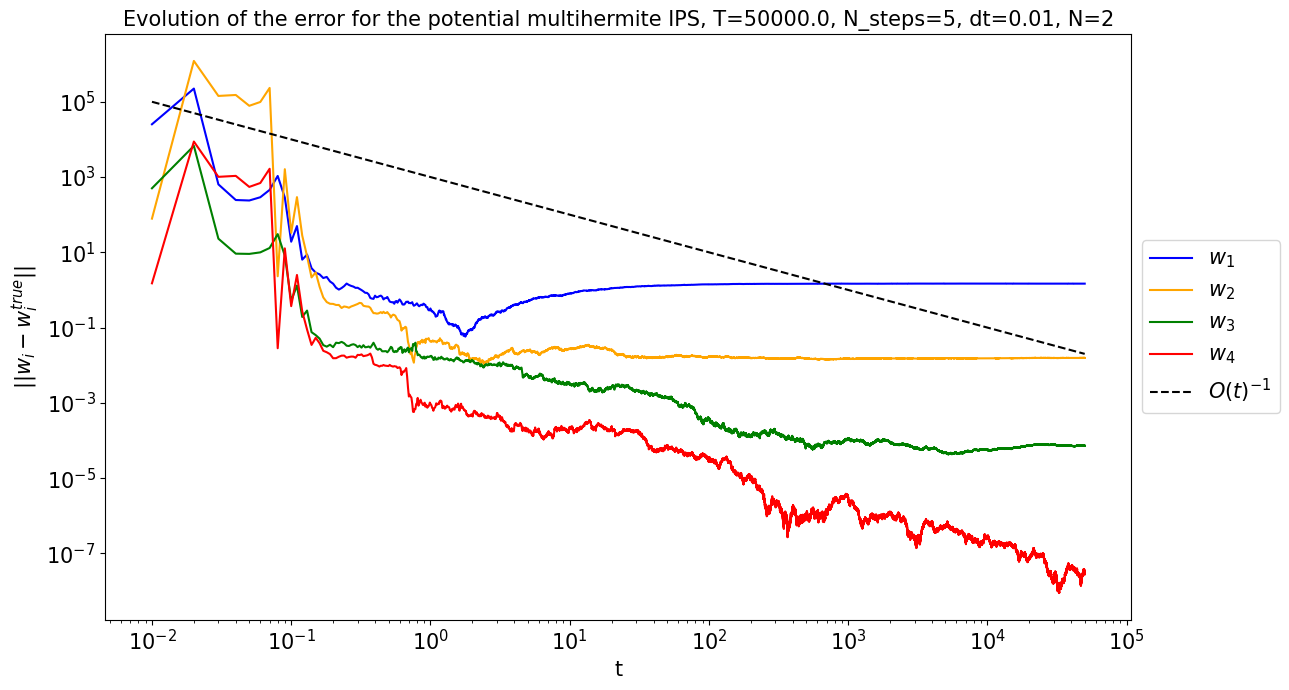

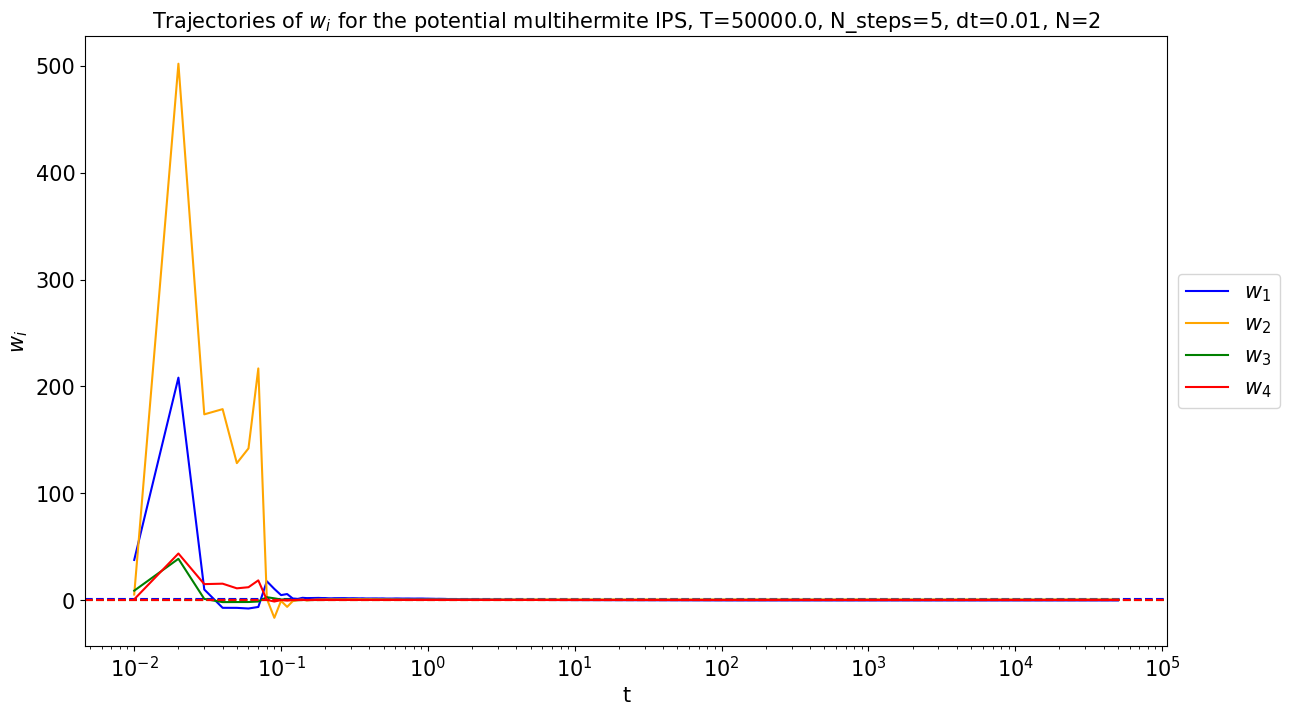

In [56]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,MLE_flag=True,saving=True)

In [58]:
main_theta_2 = utils.main(n_steps,T,dt,dict_,directory,model,MLE_flag=False,self_proc=models.sgd_hermite)

running main utils
w_true: [1.         0.5        0.33333333 0.25      ]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:20<00:00, 24897.66it/s]


[1.00282572 0.48708275 0.34453203 0.25012305]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:24<00:00, 24504.40it/s]


[1.01185448 0.49843053 0.3342988  0.2528744 ]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:24<00:00, 24437.72it/s]


[0.99793621 0.49040508 0.3455334  0.2418307 ]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:21<00:00, 24791.74it/s]


[0.99721099 0.4937882  0.33826349 0.25356036]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:25<00:00, 24369.78it/s]


[1.00800449 0.50248627 0.31784104 0.24021362]


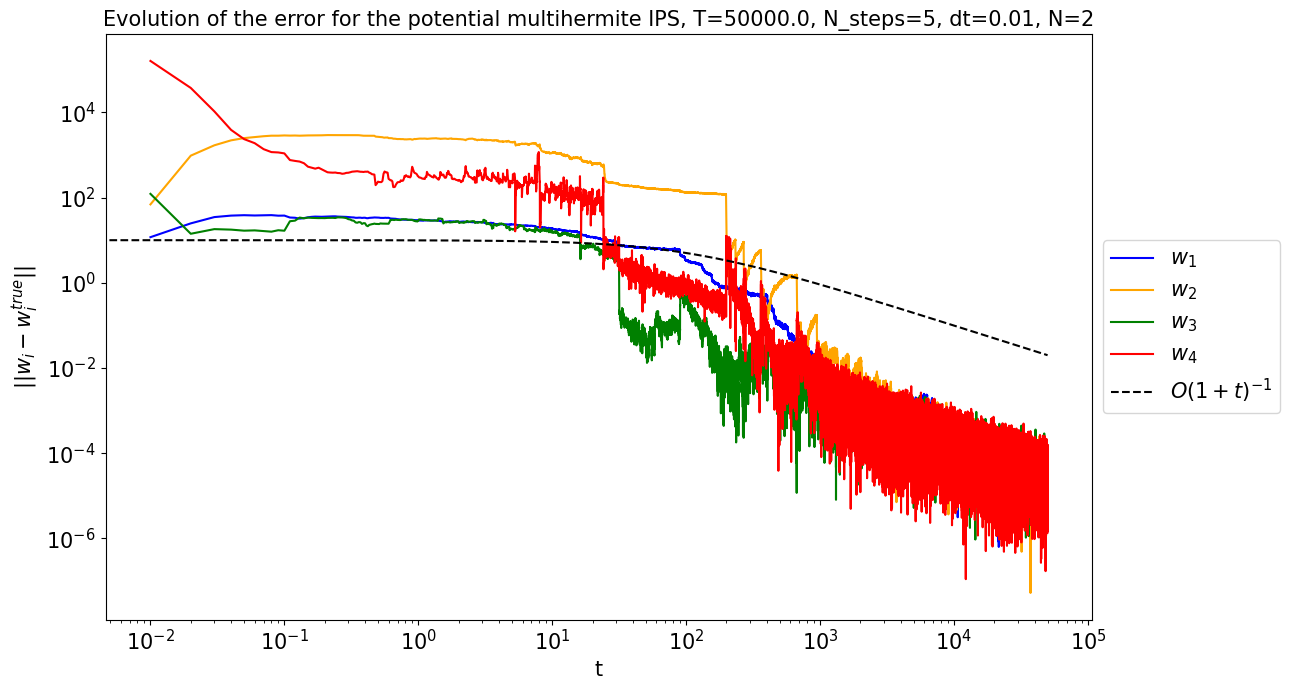

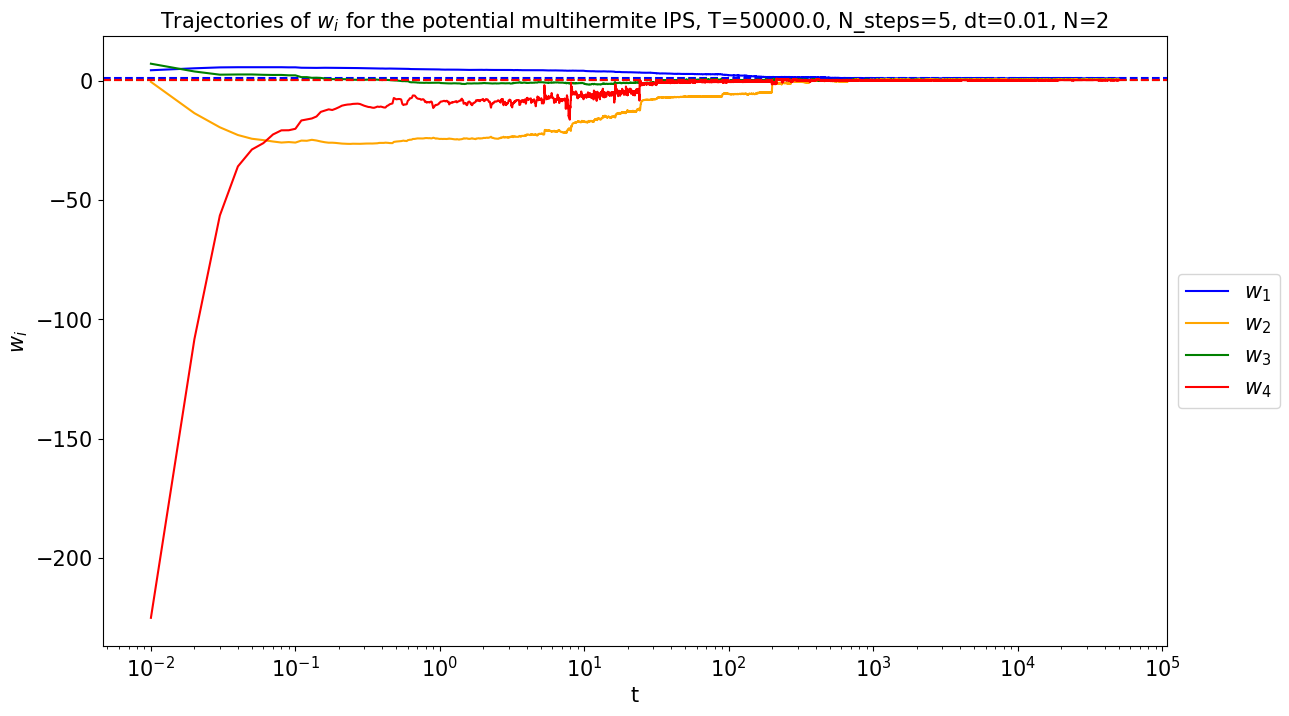

In [59]:
utils.error_analysis(n_steps,T,dt,main_theta_2,w_true,"plots",dict_,model,MLE_flag=False,saving=False)

#### Curie-Weiss

In [2]:
T = 5e4
N = 2
J = 2
n_steps = 5
dt = 1e-2

In [3]:
model = "curie_weiss"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = utils.dict_(model,N,J)
w_true = dict_["theta_star_dist"]
print(w_true)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['n2']}.npy") # n_step,time,particles,1

[0.     0.0625]
-3.523958483928884 3.423103039454579


In [21]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,MLE_flag=True,domain="real_line")

running main utils
w_true: [0.     0.0625]
theta shape (5, 2, 2)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:08<00:00, 38838.96it/s]


[[-0.00038086]
 [ 0.06262018]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:08<00:00, 38816.53it/s]


[[-0.00052106]
 [ 0.06358771]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:08<00:00, 38824.81it/s]


[[-0.00125053]
 [ 0.06399556]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:09<00:00, 38488.92it/s]


[[-0.00119117]
 [ 0.06172456]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:10<00:00, 38445.75it/s]


[[0.00247508]
 [0.06216911]]


/Users/evandieren/Desktop/MF/mean_field_SDEs/utils.py:130: RuntimeWarning: divide by zero encountered in divide
  


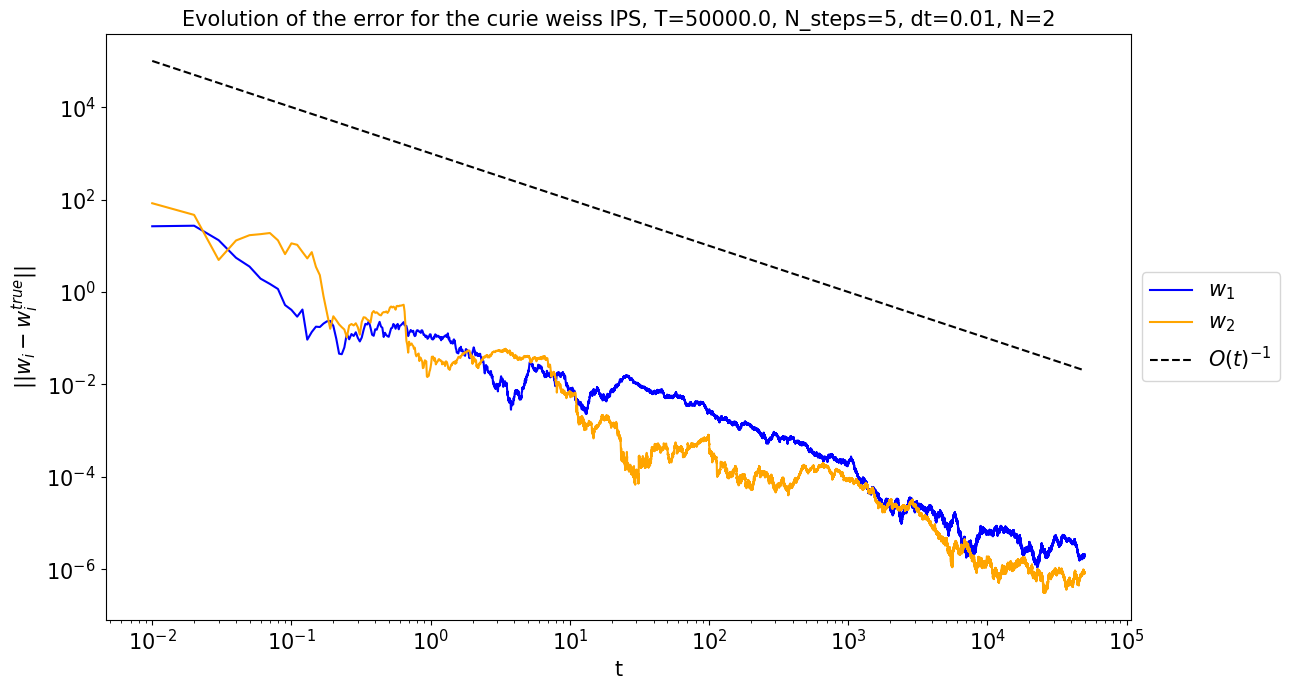

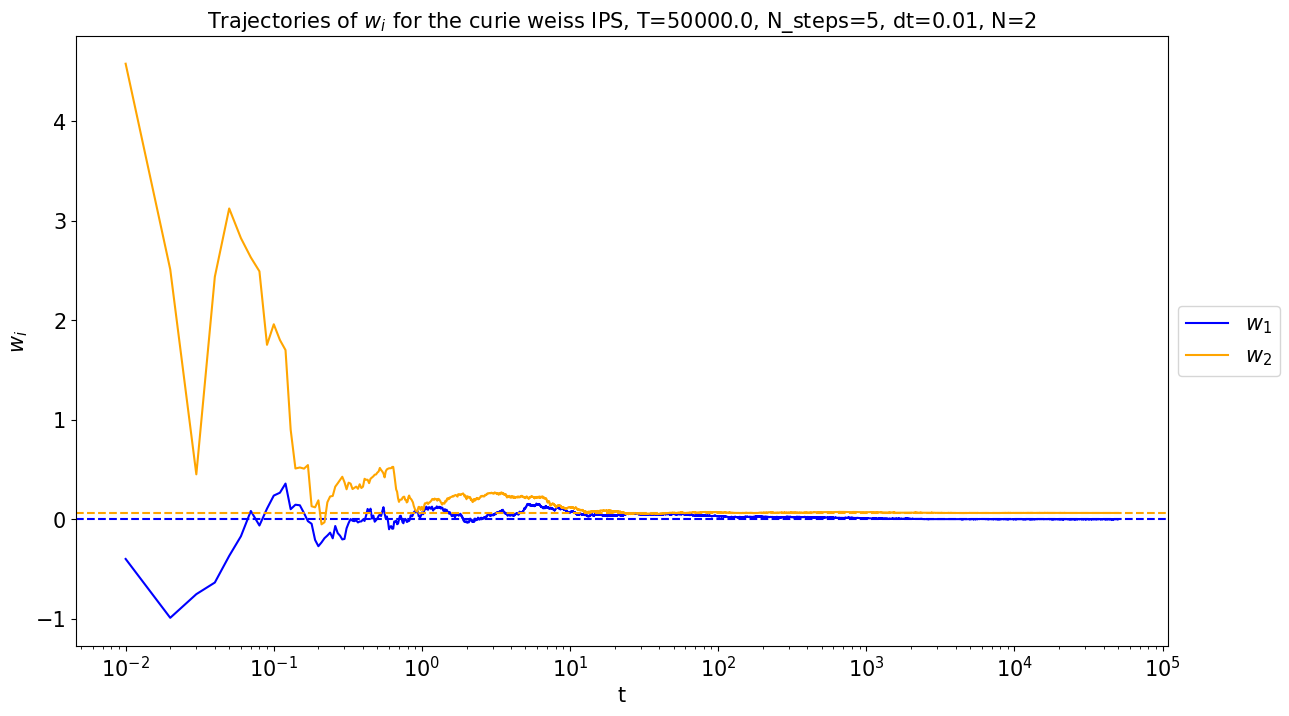

In [25]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,MLE_flag=True,saving=True)

### Study over N

In [4]:
model = "curie_weiss"
directory = "data"
path = Path(f"./{directory}/{model}")
T = 5e4
J = 2
n_steps = 5
dt = 1e-2
N = 20
dict_ = models.dict_(model,N,J)
w_true = dict_["theta_star_dist"]
print(w_true)
#theta_0 = st.uniform(loc=0,scale=10).rvs(n_steps*dict_['n1']*dict_['J']).reshape(n_steps,dict_['n1'],dict_['J'])

[0.     0.0625]


In [5]:
theta_0 = np.load(f"./data/{model}/STUDY_N_theta_0_20.npy")

20
[0.     0.0625]
3.2914879710688183e-09 6.283185305502041
running main utils
w_true: [0.     0.0625]
theta shape (5, 20, 2)
n_step 0


100%|████████████████████████████████████████████████████████████████████████████| 5000000/5000000 [09:52<00:00, 8440.38it/s]


[[-6.35521253e-05]
 [ 6.25109765e-02]]
n_step 1


100%|████████████████████████████████████████████████████████████████████████████| 5000000/5000000 [09:49<00:00, 8485.12it/s]


[[0.00026928]
 [0.06258532]]
n_step 2


100%|████████████████████████████████████████████████████████████████████████████| 5000000/5000000 [09:46<00:00, 8519.17it/s]


[[-0.00060131]
 [ 0.06242394]]
n_step 3


100%|████████████████████████████████████████████████████████████████████████████| 5000000/5000000 [09:57<00:00, 8367.60it/s]


[[-0.00015854]
 [ 0.06246044]]
n_step 4


100%|████████████████████████████████████████████████████████████████████████████| 5000000/5000000 [09:56<00:00, 8378.70it/s]


[[0.00058829]
 [0.06235213]]


/Users/evandieren/Desktop/MF/mean_field_SDEs/utils.py:130: RuntimeWarning: divide by zero encountered in divide
  y =10/(0.01*x)


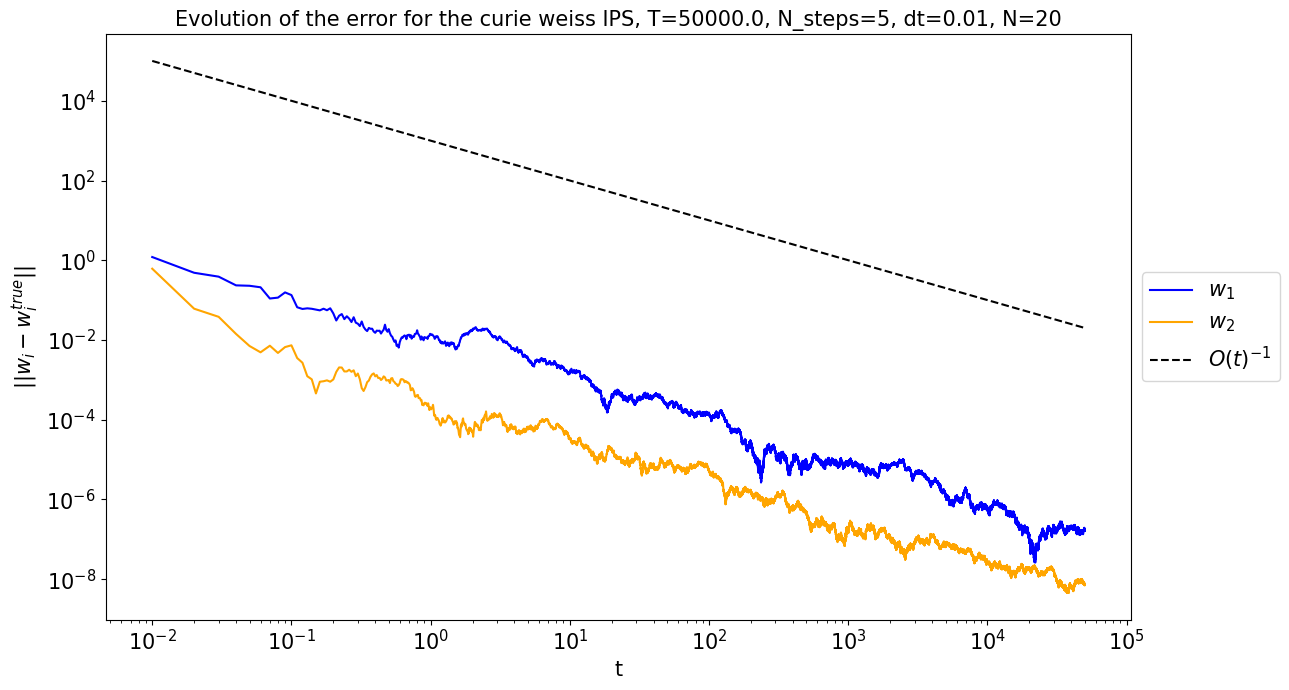

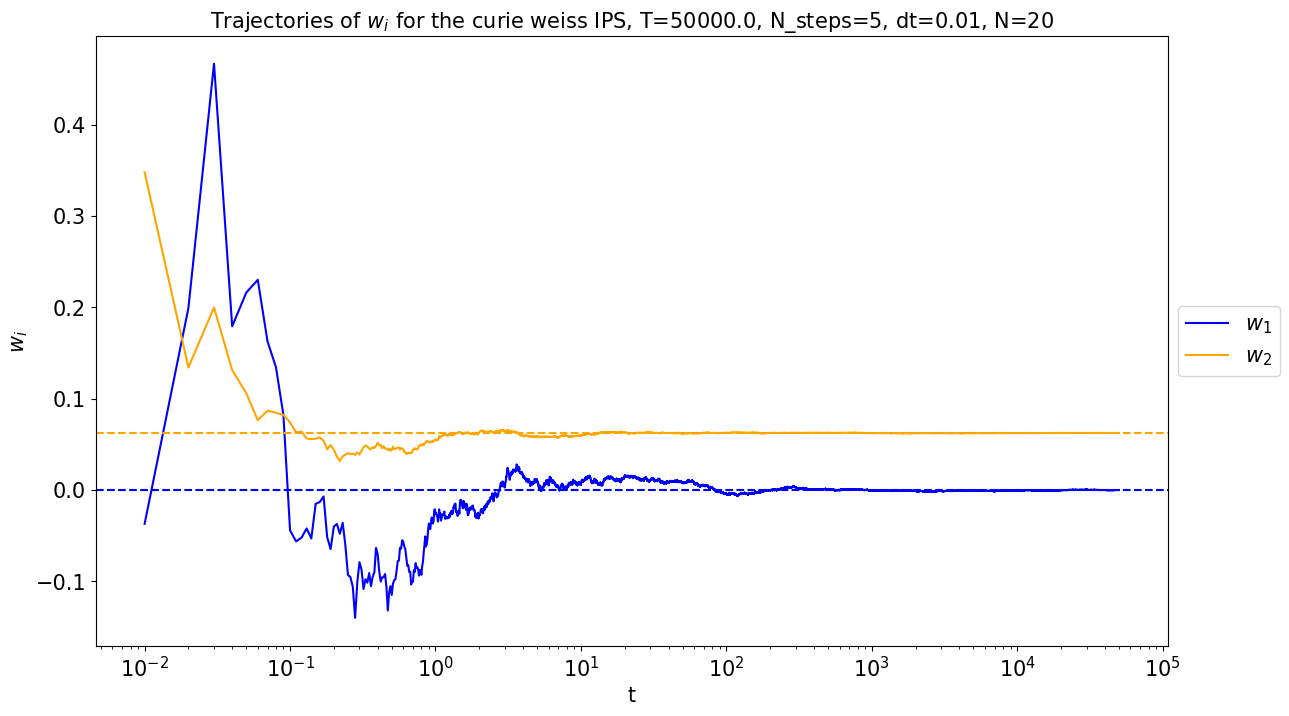

In [7]:
Ns = [20]
for N in Ns:
    print(N)
    print(w_true)
    dict_ = utils.dict_(model,N,J,w_true)
    #utils.gen_data(n_step,dt,T,dict_,directory,model)
    #theta_0 = np.concatenate((theta_0,
    #                      st.uniform(loc=0,scale=10).rvs(n_step*(dict_['n1']-theta_0.shape[1])*dict_['n2']).reshape(n_step,(dict_['n1']-theta_0.shape[1]),dict_['n2'])),
    #                    axis = 1)
    #np.save(f"./data/{model}/STUDY_N_theta_0_{N}.npy",theta_0)
    # asserting the loading is correct
    X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
    print(np.min(X),np.max(X))
    dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
    main_theta = utils.main(n_steps,T,dt,dict_,directory,model,MLE_flag=True,domain="real_line")
    np.save(f"./data/{model}/STUDY_N_main_theta_{N}_MLE.npy",main_theta)
    #print(np.mean(main_theta,axis=(0,2))[-1])
    utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,MLE_flag=True,saving=True)

In [6]:
Ns = [5,10,15,20]
err = np.zeros((len(Ns),int(T/dt)+1,2))
for k,N in enumerate(Ns):
    main_theta = np.load(f"./data/{model}/STUDY_N_main_theta_{N}_MLE.npy")
    print(main_theta.shape)
    main_theta_est = np.mean(main_theta,axis=0)[:,:,0]
    err[k] = (main_theta_est-w_true)**2
    #for i in tqdm(range(int(T/dt))):    
    #    W_est_t = dict_["target_func"](x,main_theta_est[i,:])+1/4
    #    err[k,i] = np.mean((W_true_vals-W_est_t)**2)

(5, 5000001, 2, 1)
(5, 5000001, 2, 1)
(5, 5000001, 2, 1)
(5, 5000001, 2, 1)


In [7]:
err.shape

(4, 5000001, 2)

/var/folders/_9/t15gcl7n46gfkfn5s0477d6c0000gn/T/ipykernel_29186/4008059311.py:3: RuntimeWarning: divide by zero encountered in divide
  y = 100/x


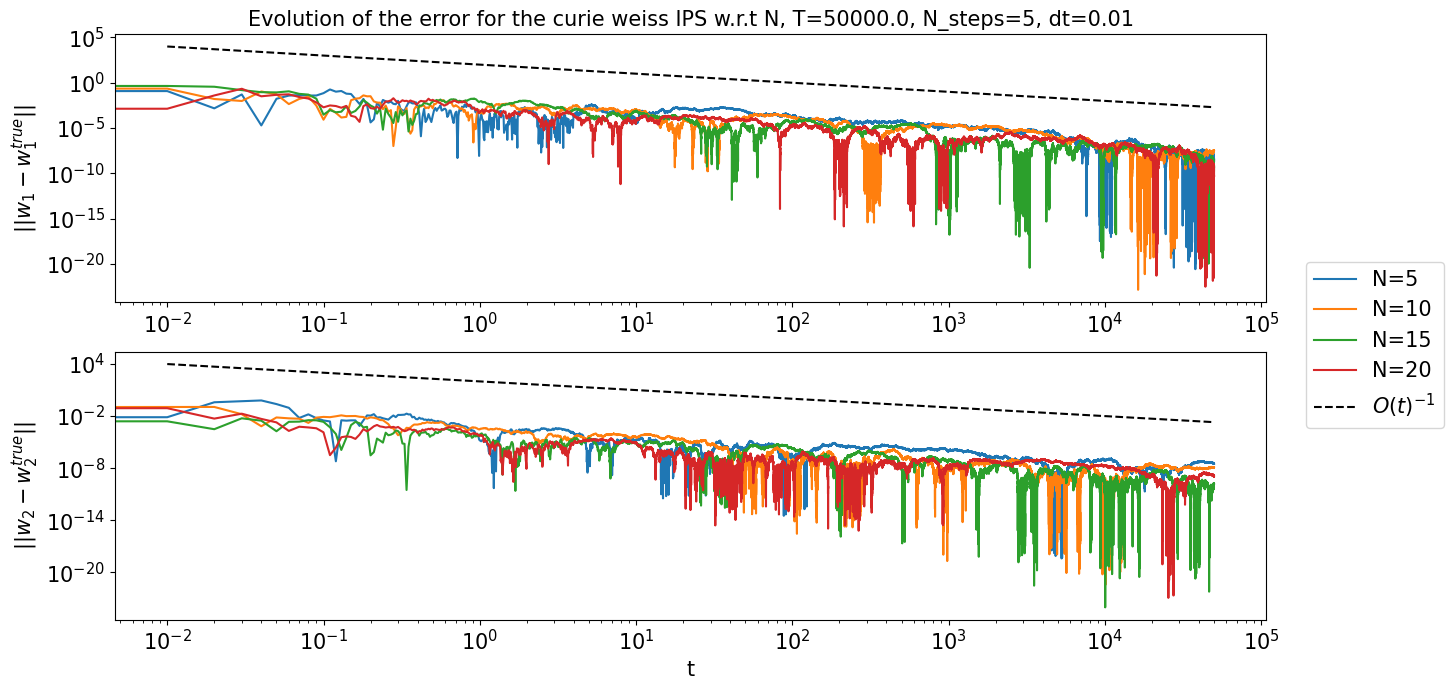

In [8]:
fig, axs = plt.subplots(2,figsize=(13, 7))
x = np.arange(0,T+dt,dt)
y = 100/x
labels= ["N="+str(N) for N in Ns]
axs[0].plot(x,err[:,:,0].T,label=labels)
axs[1].plot(x,err[:,:,1].T)
axs[0].plot(x,y, color = 'k', linestyle = '--',label=r"$O(t)^{-1}$")
axs[1].plot(x,y, color = 'k', linestyle = '--')
axs[0].set_title(f"Evolution of the error for the {model.replace('_',' ')} IPS w.r.t N, T={T}, N_steps={n_steps}, dt={dt}",size=15)
axs[0].tick_params(axis='both',labelsize=15)
axs[1].tick_params(axis='both',labelsize=15)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
axs[0].set_ylabel(r'$||w_1-w^{true}_1||$',size = 15)
axs[1].set_ylabel(r'$||w_2-w^{true}_2||$',size = 15)
axs[1].set_xlabel('t',size = 15)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
plt.tight_layout()
plt.savefig(f"./plots/{model}/STUDY_N_MLE.png", bbox_inches='tight')